# **Project 1 Revisited**
# **Part 2: Global Explanations**

## Load Saved Joblib File


**Load the contents of "regression_models.joblib" file into a variable called "loaded_joblib."**

In [1]:
import joblib
loaded_joblib = joblib.load('regression_models.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForest'])

**Save each object from the loaded_joblib dictionary as a separate variable.**

In [2]:
X_train = loaded_joblib['X_train']

In [3]:
y_train = loaded_joblib['y_train']

In [4]:
X_test = loaded_joblib['X_test']

In [5]:
y_test = loaded_joblib['y_test']

In [6]:
preprocessor = loaded_joblib['preprocessor']

In [7]:
LinearRegression = loaded_joblib['LinearRegression']

In [8]:
RandomForest = loaded_joblib['RandomForest']

## Explain tree-based model with shap:


- Create an X_shap and y_shap variable from your training data (use shap.sample as needed).
- Create a model explainer,
- Calculate the shap values for your model.
- Create a summary plot - with plot_type='bar':


  - In a Markdown cell below, display your saved feature importance image (that you used in your README) and compare the most important features according to SHAP vs. your original feature importances.

    - Are they the same features in both? If not, what's different?


  - Save your bar summary plot figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).


- Create a second summary plot - with plot_type='dot'

    - In a markdown cell, interpret the top 3 most important features and how they influence your model's predictions.

    - Save your figure as a .png file inside your  repository (you will need this for the final piece of this assignment - Update Your README).

***

### Create an X_shap and y_shap variable from your training data (use shap.sample as needed).

In [9]:
import shap
shap.initjs()

In [10]:
len(X_train)

6392

In [11]:
X_shap = shap.sample(X_train,nsamples=400,random_state=42)
X_shap.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
2937,8.365,0.039811,191.3188,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6371,9.695,0.030414,221.3114,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3762,17.250,0.000000,37.5822,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
419,19.000,0.027139,127.3336,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8475,18.600,0.080627,92.5436,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap 

2937    2285.0256
6371    2217.1140
3762     196.4110
419     2940.1728
8475     378.1744
          ...    
5381    2841.6344
4918    3175.8660
1299    2960.1468
8096    1163.8184
2228     969.4048
Name: Item_Outlet_Sales, Length: 400, dtype: float64

### Create a model explainer

In [13]:
explainer = shap.Explainer(RandomForest)
explainer

### Calculate the shap values for the model.

In [14]:
## Getting the shap values
shap_values = explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

In [15]:
shap_values.shape

(400, 32)

In [16]:
## Reset the index for sampled data to match shap_values integer index
X_shap = X_shap.reset_index(drop=True)
y_shap = y_shap.reset_index(drop=True)

In [17]:
shap_values[0]

.values =
array([ 1.05902748e-01,  5.96851417e-01,  7.97819052e+02,  4.09209606e-01,
        4.03224030e-01,  8.27952569e-03, -3.31447652e-02, -4.53199900e-02,
       -3.51533209e-02,  1.68214540e-02, -1.25749342e-01,  1.09508290e+00,
        6.73897935e-02, -1.56783410e-01, -8.60840217e-02, -1.12150868e-01,
        1.01429173e-04,  5.37356745e-03,  7.18375681e-02, -1.12688434e-01,
       -8.79354588e-02,  7.07495590e-01, -1.04838018e-02,  0.00000000e+00,
       -7.46825356e-03, -2.29204486e-02,  0.00000000e+00, -2.03387490e-03,
        2.95675371e+02,  1.06326931e+00,  1.27099977e+00, -2.23295639e+02])

.base_values =
array([2210.70694855])

.data =
array([8.3650000e+00, 3.9811272e-02, 1.9131880e+02, 0.0000000e+00,
       1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
      

## Create a summary plot - with plot_type='bar'

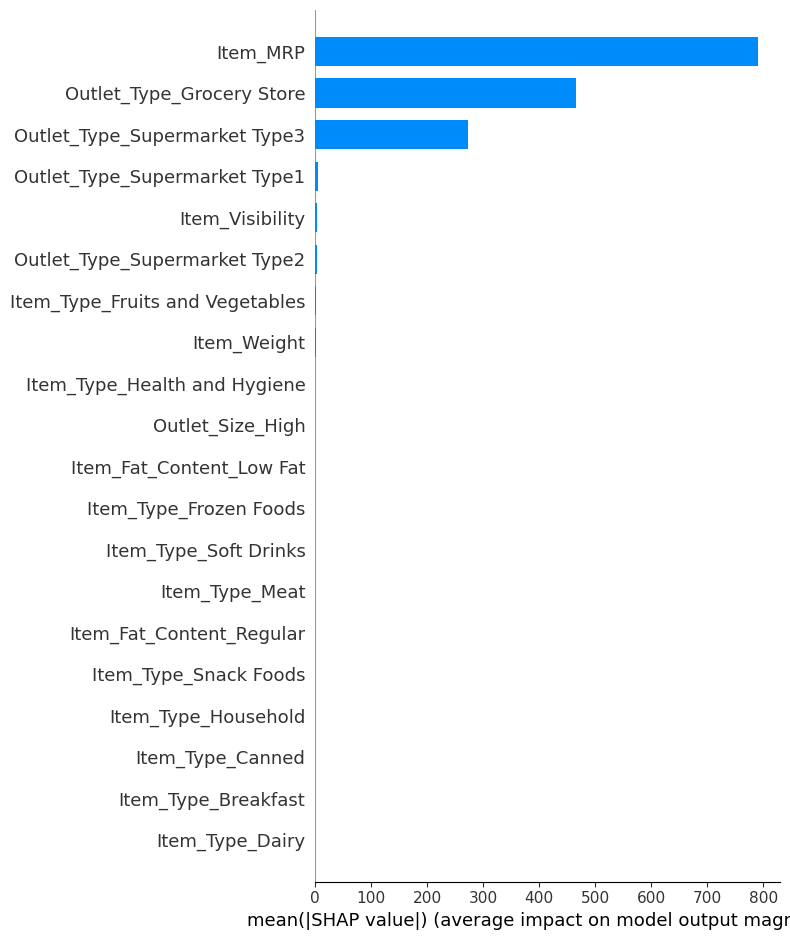

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
shap.summary_plot(shap_values,features= X_shap, plot_type='bar');

Top 5 Most Important Features according to SHAP:
  - `Item_MRP`
  - `Outlet_Type_Grocery Store`
  - `Outlet_Type_Supermarket Type3`
  - `Outlet_Type_Supermarket Type1`
  - `Item_Visibility`

### Compare the most important features according to SHAP vs. the original feature importances that I saved earlier.

#### Original Feature Imporances Image

<div align="center">
<img src="images/tuned_random_forest_top5_important_features.png">
</div>

Top 5 Most Important Features:
  - `Item_MRP`
  - `Outlet_Type_Grocery Store`
  - `Outlet_Type_Supermarket Type3`
  - `Item_Visibility`
  - `Outlet_Type_Supermarket Type1`

**COMPARISON**: 
- **The top 5 most important features are the same between `SHAP` and Random Forest built-in `feature_importances_`**. 
  - The top 3 features are exactly in the same order for both methods. 
  - The order was swapped for the 4th and 5th feature when I compared SHAP and Random Forest feature_importances_.

### Save bar summary plot figure as a .png file

In [19]:
fig.savefig('images/part2_shap_summary_plot_bar.png', bbox_inches='tight')

## Create a second summary plot - with plot_type='dot'

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


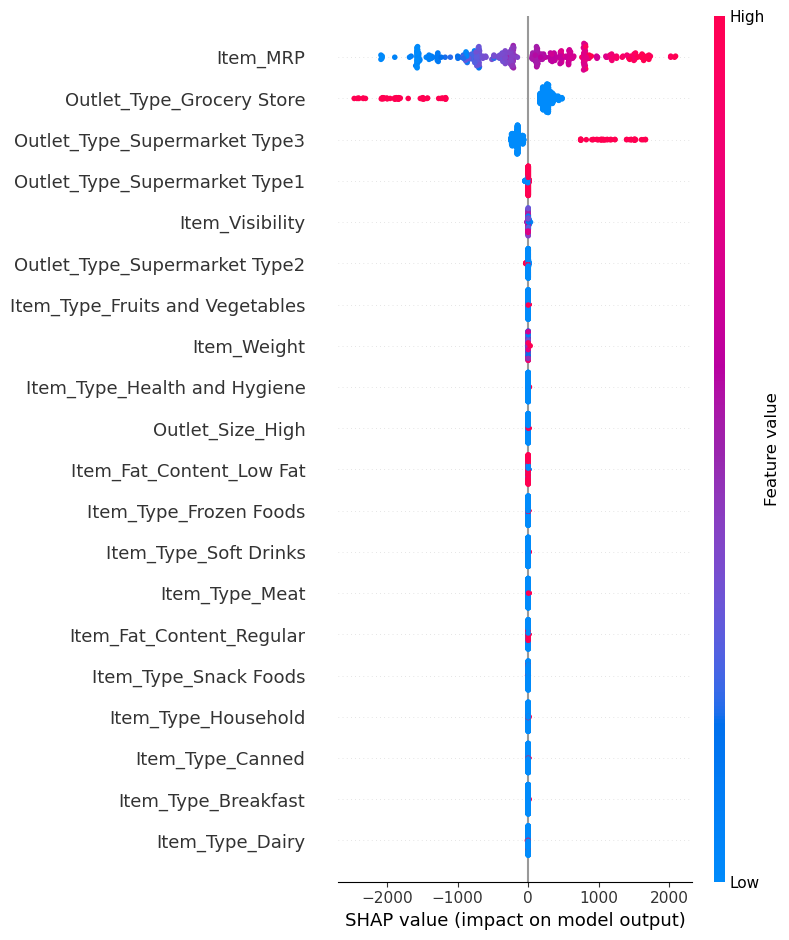

In [20]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values,X_shap)

### Interpret the top 3 most important features and how they influence the model's predictions.

The top 3 most important features are:

1. `Item_MRP`
2. `Outlet_Type_Grocery Store`
3. `Outlet_Type_Supermarket Type3`

**Interpretation**:
- `Item_MRP` 
   - This feature has the largest effect on the model's predictions as it was the first bar at the top of the plot.
   - Since the **red dots are on the positive side**, it means that the higher the Item_MRP, the more likely the model would predict that outlet sales is high.

- `Outlet_Type_Grocery Store`
   - This is a One-Hot-Encoded feature.
   - Since the **red dots are on the negative side**, it means that it is less likely that the model will predict high outlet sales if Outlet Type is Outlet_Type_Grocery Store.
   - If Outlet_Type_Grocery Store == 1, the model is less likely to predict high outlet sales.
   - If Outlet_Type_Grocery Store == 0, the model is more likely to predict high outlet sales.
   
- `Outlet_Type_Supermarket Type3`
   - This is a One-Hot-Encoded feature.
   - Since the **red dots are on the positive side**, it means that if the item is sold at Outlet_Type_Supermarket Type3, it is more likely that the model will predict the item to have high outlet sales. 
   - If Outlet_Type_Supermarket Type3 == 1, the model is more likely to predict high outlet sales.
   - If Outlet_Type_Supermarket Type3 == 0, the model is less likely to predict high outlet sales.

### Save figure as a .png file

In [21]:
fig.savefig('images/part2_shap_summary_plot_dot.png', bbox_inches='tight')

# **Part 3 - Local Explanations**

## Select 2 example rows/outlets based on the insights gained from Part 1 & 2.

### Example1: Row with highest target value

In [22]:
y_shap.sort_values(ascending=False).head(3)

94     10256.6490
287     8474.3024
252     8474.3024
Name: Item_Outlet_Sales, dtype: float64

In [23]:
X_shap[X_shap.index == 94]

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
94,14.85,0.019495,261.291,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [24]:
X_shap.loc[94, :]

Item_Weight                         14.850000
Item_Visibility                      0.019495
Item_MRP                           261.291000
Item_Fat_Content_Low Fat             0.000000
Item_Fat_Content_Regular             1.000000
Item_Type_Baking Goods               0.000000
Item_Type_Breads                     0.000000
Item_Type_Breakfast                  0.000000
Item_Type_Canned                     0.000000
Item_Type_Dairy                      1.000000
Item_Type_Frozen Foods               0.000000
Item_Type_Fruits and Vegetables      0.000000
Item_Type_Hard Drinks                0.000000
Item_Type_Health and Hygiene         0.000000
Item_Type_Household                  0.000000
Item_Type_Meat                       0.000000
Item_Type_Others                     0.000000
Item_Type_Seafood                    0.000000
Item_Type_Snack Foods                0.000000
Item_Type_Soft Drinks                0.000000
Item_Type_Starchy Foods              0.000000
Outlet_Size_High                  

This dataset is from Outlet_Type: **Supermarket Type1.**

### Example2: Row with lowest target value

In [25]:
y_shap.sort_values(ascending=True).head(3)

290    45.9402
170    47.9376
217    73.2380
Name: Item_Outlet_Sales, dtype: float64

In [26]:
X_shap[X_shap.index == 290]

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
290,7.63,0.225477,45.1402,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [27]:
X_shap.loc[290, :]

Item_Weight                         7.630000
Item_Visibility                     0.225477
Item_MRP                           45.140200
Item_Fat_Content_Low Fat            0.000000
Item_Fat_Content_Regular            1.000000
Item_Type_Baking Goods              0.000000
Item_Type_Breads                    0.000000
Item_Type_Breakfast                 0.000000
Item_Type_Canned                    0.000000
Item_Type_Dairy                     0.000000
Item_Type_Frozen Foods              0.000000
Item_Type_Fruits and Vegetables     0.000000
Item_Type_Hard Drinks               0.000000
Item_Type_Health and Hygiene        0.000000
Item_Type_Household                 0.000000
Item_Type_Meat                      0.000000
Item_Type_Others                    0.000000
Item_Type_Seafood                   0.000000
Item_Type_Snack Foods               1.000000
Item_Type_Soft Drinks               0.000000
Item_Type_Starchy Foods             0.000000
Outlet_Size_High                    0.000000
Outlet_Siz

The data point with lowest target value is from Outlet_Type: **Grocery Store**.

### Explain why I chose these rows/outlets: 
    
I selected a row that had the lowest value in the target column and a row that had the highest value in the target column.

- Store that had the item with lowest sales had Outlet_Type of `Grocery Store`.
- Store that had the item with highest sales (within the 400 samples of SHAP) had Outlet_Type of `Supermarket Type1`.

Above result is in line with what I observed in the SHAP Summary Plot (dot) earlier when I looked at the Top 5 most important features.

## Lime tabular explanation

In [28]:
from lime.lime_tabular import LimeTabularExplainer
lime_explainer =LimeTabularExplainer(training_data=X_shap.values, feature_names=X_shap.columns, mode='regression')
lime_explainer

### Example1: Highest Sale in 400 samples (Supermarket Type1) index = 94

In [29]:
exp = lime_explainer.explain_instance(X_shap.loc[94],
                               RandomForest.predict)
exp.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


In [30]:
y_shap.loc[94]

10256.649

**Interpretation**:
    
1. As we can see from above, an example item from Supermarket Type 1 group had a high predicted outlet sales value of **4085.11**.

2. Item_MRP being > 183.59 had a positive impact on the outlet sales. 

3. Not being an `Outlet_Type_Grocery Store` (Value == 0) had a positive impact on the outlet sales.

4. Not being an `Outlet_Type_Supermarket Type3` (Value == 0) had a negative impact on the outlet sales.


### Example2: Lowest Sale in 400 samples (Grocery Store) index = 290

In [31]:
exp = lime_explainer.explain_instance(X_shap.loc[290],
                               RandomForest.predict)
exp.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


In [32]:
y_shap.loc[290]

45.9402

**Interpretation**:
    
1. As we can see from above, an example item from Grocery Store group had a low predicted outlet sales value of **101.82**.

2. Item_MRP being <=99.43 had a negative impact on the outlet sales. 

3. Being an `Outlet_Type_Grocery Store` (Value == 1) had an negative impact on the outlet sales.

4. Not being an `Outlet_Type_Supermarket Type3` (Value == 0) had a negative impact on the outlet sales.

## Individual Force Plot

### Example1: Highest Sale in 400 samples (Supermarket Type1) index = 94

In [37]:
## Individual forceplot
shap.force_plot(explainer.expected_value,
                shap_values= shap_values[94].values,
               features=X_shap.loc[94])

- Base value = 2211
- SHAP value = 4085.11
- The contributions of the red features are greater than the blue, which means there is a greater "push" towards **higher** outlet sales, so the final prediction is high outlet sales.
- The wider the segment is for the feature, the greater its contribution to the prediction is.
  - Therefore, in this case, Item_MRP is the biggest factor, followed by **not** being an Outlet_Type_Grocery Store.
  - The factor that is pushing the outlet sales to lower direction is that it is **not** an Outlet_Type_Supermarket Type3.

### Example2: Lowest Sale in 400 samples (Grocery Store) index = 290

In [38]:
## Individual forceplot
shap.force_plot(explainer.expected_value,
                shap_values= shap_values[290].values,
               features=X_shap.loc[290])

- Base value = 2211
- SHAP value = 101.82
- The contributions of the blue features are much greater than the red which means a greater "push" towards **lower** outlet sales, so the final prediction is low outlet sales.
- The wider the segment is for the feature, the greater its contribution to the prediction is.
  - Therefore, in this case, the low Item_MRP value and the fact that it is an Outlet_Type_Grocery Store are contributing largely to the low predicted value.